In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../analysis/

/srv/data/home/jlee782/segmentation/analysis


In [3]:
import pickle as pkl
from PixelEM import * 

/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [41]:
sample = "10workers_rand0"
objid = 5
algo = "GT"
tiles = pkl.load(open("../analysis/pixel_em/{}/obj{}/tiles.pkl".format(sample,objid)))
log_probability_in_mask=pkl.load(open("../analysis/pixel_em/{}/obj{}/{}_p_in_mask_ground_truth.pkl".format(sample,objid,algo)))
log_probability_not_in_mask =pkl.load(open("../analysis/pixel_em/{}/obj{}/{}_p_not_in_ground_truth.pkl".format(sample,objid,algo)))

In [42]:
#using ground truth ia for testing purposes
gt = pkl.load(open("../analysis/pixel_em/obj{}/gt.pkl".format(objid)))
gt_idxs = set(zip(*np.where(gt)))

In [50]:
candidate_tiles_lst = []
metric_lst = []
ia_lst = [] 
picked_tiles = []
# compute I/O metric for all tiles
for tile in tiles[1:]:#ignore the large outside tile
    #intersection_area = float(len(gt_idxs.intersection(set(tile))))
    pInT = np.abs(log_probability_in_mask[list(tile)[0]]) # all pixels in same tile should have the same pInT
    pNotInT = np.abs(log_probability_not_in_mask[list(tile)[0]])
    norm_pInT = pInT/(pNotInT+pInT) #normalized pInT 
    assert norm_pInT<=1 and norm_pInT>=0
    intersection_area = float(len(tile) * norm_pInT) #estimated intersection area
    GTintersection_area = float(len(gt_idxs.intersection(set(tile)))) # exact intersection areas
    intersection_area = GTintersection_area# for testing purposes only
    print intersection_area,GTintersection_area,norm_pInT,len(tile)
    outside_area = float(len(tile) - intersection_area)
    if outside_area!=0: 
        metric = intersection_area/outside_area
        metric_lst.append(metric)
        candidate_tiles_lst.append(tile)
        ia_lst.append(intersection_area)
    else:# if outside area =0, then tile completely encapsulated by GT, it must be included in picked tiles
        picked_tiles.append(tile)

2.0 2.0 0.747907510513 2
16.0 16.0 0.72094300658 16
0.0 0.0 0.736063022823 53
1.0 1.0 0.745560607976 15
0.0 0.0 0.72094300658 2
0.0 0.0 0.72094300658 3
4.0 4.0 0.747907510513 4
0.0 0.0 0.745560607976 9
0.0 0.0 0.715618377269 4
2.0 2.0 0.736063022823 5
0.0 0.0 0.747907510513 73
1.0 1.0 0.715618377269 1
0.0 0.0 0.720964705702 5
0.0 0.0 0.745560607976 1
0.0 0.0 0.745560607976 2
1.0 1.0 0.715618377269 1
0.0 0.0 0.707165041399 3
1.0 1.0 0.731971137195 1
1.0 1.0 0.736063022823 1
1.0 1.0 0.725761738704 1
1.0 1.0 0.736063022823 1
1.0 1.0 0.72094300658 1
1.0 1.0 0.72094300658 1
0.0 0.0 0.745560607976 5
0.0 0.0 0.72094300658 1
0.0 0.0 0.731971137195 1
0.0 0.0 0.731971137195 4
0.0 0.0 0.731971137195 5
0.0 0.0 0.731971137195 7
0.0 0.0 0.707165041399 2
0.0 0.0 0.707165041399 1
1.0 1.0 0.725761738704 1
0.0 0.0 0.725761738704 2
1.0 1.0 0.736063022823 1
0.0 0.0 0.747907510513 1
1.0 1.0 0.745560607976 1
0.0 0.0 0.715618377269 1
5.0 5.0 0.715618377269 7
2.0 2.0 0.736063022823 2
0.0 0.0 0.72094300658 1
0

0.0 0.0 0.133418185243 1
1.0 1.0 0.115212919506 1
1.0 1.0 0.125114230858 1
6.0 6.0 0.108245626286 6
7.0 7.0 0.112275543785 7
2.0 2.0 0.112275543785 2
1.0 1.0 0.122416266206 1
2.0 2.0 0.105553396499 2
2.0 2.0 0.131061875361 2
1.0 1.0 0.115212919506 1
2.0 2.0 0.131424024428 2
0.0 0.0 0.125114230858 1
1.0 1.0 0.122434392576 1
1.0 1.0 0.133418185243 1
1.0 1.0 0.124140280861 1
1.0 1.0 0.115630628714 1
1.0 1.0 0.130754416788 1
2.0 2.0 0.124140280861 2
0.0 0.0 0.118994090166 1
2.0 2.0 0.122416266206 2
1.0 1.0 0.125114230858 1
3.0 3.0 0.130754416788 3
1.0 1.0 0.122416266206 1
0.0 0.0 0.125114230858 1
1.0 1.0 0.110340316882 1
1.0 1.0 0.122416266206 1
1.0 1.0 0.131716913704 1
1.0 1.0 0.1291782503 1
1.0 1.0 0.126498267377 1
3.0 3.0 0.0833537306437 3
12.0 12.0 0.0792113468216 12
1.0 1.0 0.0705782066583 1
1.0 1.0 0.0855061155271 1
3.0 3.0 0.0705782066583 3
0.0 0.0 0.087570458571 2
1.0 1.0 0.0705782066583 1
1.0 1.0 0.0705782066583 1
0.0 0.0 0.0929479506343 2
1.0 1.0 0.0705782066583 1
6.0 6.0 0.07279

In [51]:
assert len(metric_lst)==len(candidate_tiles_lst)==len(ia_lst)
srt_decr_idx = np.argsort(metric_lst)[::-1] # sorting from largest to smallest metric_lst
GT_area = 0 #new ground truth area
ia_cum = 0 #cumulative intersection area
jaccard_lst = []
prev_jac = -1000
for tidx  in srt_decr_idx:
    tile = candidate_tiles_lst[tidx]
    ia = ia_lst[tidx]
    jaccard = (ia_cum+ia)/float(GT_area+len(tile)) # the new jaccard if that tile is actually added
    jaccard_lst.append(jaccard)
    if jaccard >= prev_jac: 
        picked_tiles.append(tile)
        # if tile picked, update new ia and area
        prev_jac=jaccard
        ia_cum +=ia
        GT_area += len(tile)
    else: # stop when jaccard starts decreasing after the addition of a tile
        #break
        continue #for debugging purposes to see how jaccard_lst evolves, technically should break here

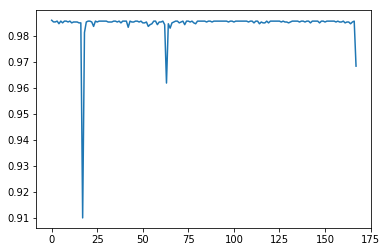

In [52]:
plt.plot(jaccard_lst)

In [53]:
len(picked_tiles)

343

In [54]:
img = np.zeros_like(log_probability_in_mask)
for t in picked_tiles:
    for tidx in t:
        img[tidx]=1

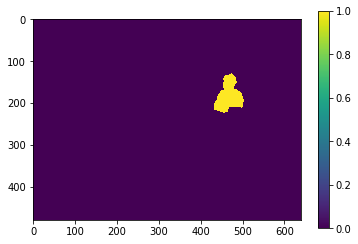

In [55]:
plt.imshow(img)
plt.colorbar()

In [56]:
intersection = (len(np.where(gt*1.==img)[0])-len(np.where(img==0)[0]))

In [57]:
p = intersection/float(len(np.where(gt*1.==1)[0]))
r = intersection/float(len(np.where(img==1)[0]))
j = intersection / float((len(np.where(gt*1.==1)[0]))+(len(np.where(img==1)[0]))-intersection)

In [58]:
print p,r,j

0.906149666584 0.940769230769 0.857242990654


In [60]:
def plot_tile(tile):
    img = np.zeros_like(log_probability_in_mask)
    for tidx in tile:
        img[tidx]=1
    plt.imshow(img)
    plt.colorbar()